In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 

from data_generator import DataGeneratorMatting
from preprocess import descale

In [2]:
img_paths = np.load("./dataset/img_paths_with_supervisely_nosmallobject_k15_withBlankDoubled_and_Custom_doubled.npy")

In [3]:
input_shape = (256, 192, 3)

In [4]:
train_params = {
            'dim': input_shape[:2],
            'batch_size': 1,
            'n_channels': input_shape[-1],
            'shuffle': True,
            'augment': True,
            'output_div' : 1,
        }

In [5]:
train_gen = DataGeneratorMatting(img_paths, **train_params)

/Users/MAC/.pyenv/versions/3.6.9/envs/tf20/lib/python3.6/site-packages/imgaug/imgaug.py:184: DeprecationWarning: Function `SimplexNoiseAlpha()` is deprecated. Use `BlendAlphaSimplexNoise` instead. SimplexNoiseAlpha is deprecated. Use BlendAlphaSimplexNoise instead. The order of parameters is the same. Parameter 'first' was renamed to 'foreground'. Parameter 'second' was renamed to 'background'.
  warn_deprecated(msg, stacklevel=3)
/Users/MAC/.pyenv/versions/3.6.9/envs/tf20/lib/python3.6/site-packages/imgaug/imgaug.py:184: DeprecationWarning: Function `FrequencyNoiseAlpha()` is deprecated. Use `BlendAlphaFrequencyNoise` instead. FrequencyNoiseAlpha is deprecated. Use BlendAlphaFrequencyNoise instead. The order of parameters is the same. Parameter 'first' was renamed to 'foreground'. Parameter 'second' was renamed to 'background'.
  warn_deprecated(msg, stacklevel=3)


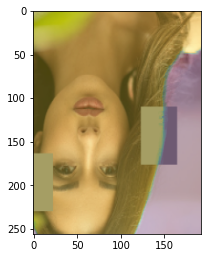

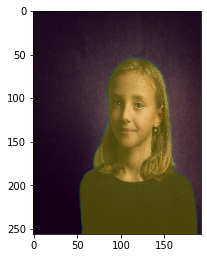

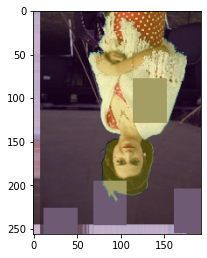

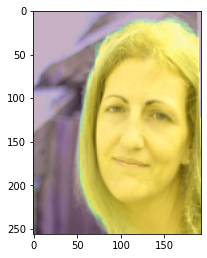

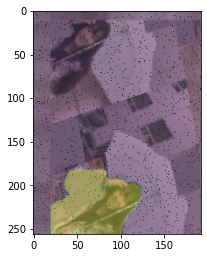

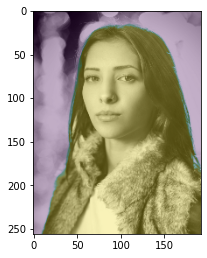

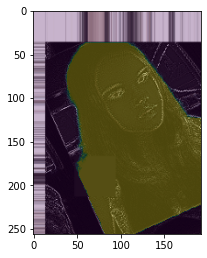

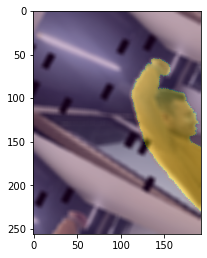

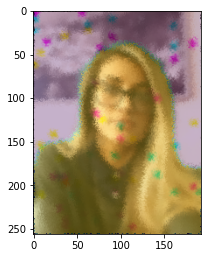

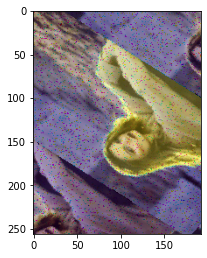

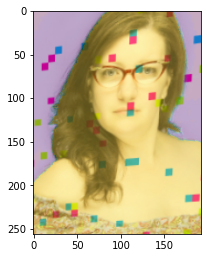

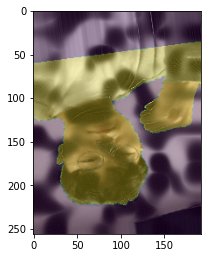

error: OpenCV(4.3.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [7]:
for gen in train_gen:
    img, labels = gen
    mask, dil = labels
    plt.figure(figsize=(3,7))
    plt.imshow(descale(img[0]))
    plt.imshow(mask[0][:,:,0], alpha=0.3)
    plt.show()